In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

from opsml.registry import (
    CardRegistry,
    DataCard,
    ExperimentCard,
    ModelCard,
    PipelineCard,
)

team = "mlops"
user_email = "mlops.com"
pipeline_code_uri = "test_pipe_uri"


In [2]:
data_registry = CardRegistry(registry_name="data", connection_type="local")
model_registry = CardRegistry(registry_name="model", connection_type="local")
experiment_registry = CardRegistry(registry_name="experiment", connection_type="local")
pipeline_registry = CardRegistry(registry_name="pipeline", connection_type="local")

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

#### Create DataCard
data_card_one = DataCard(
    data=X,
    name="test_data_one",
    team=team,
    user_email=user_email,
)
data_registry.register_card(card=data_card_one)

#### Create DataCard
data_card_two = DataCard(
    data=X,
    name="test_data_two",
    team=team,
    user_email=user_email,
)
data_registry.register_card(card=data_card_two)

{"message": "DATA_REGISTRY: test_data_one registered as version 1", "timestamp": "2023-02-09T14:58:30.852781Z", "app_env": "development", "level": "INFO"}
{"message": "DATA_REGISTRY: test_data_two registered as version 1", "timestamp": "2023-02-09T14:58:30.869646Z", "app_env": "development", "level": "INFO"}


In [3]:
##### ModelCard
model_card_one = ModelCard(
    trained_model=reg,
    sample_input_data=X[:1],
    name="test_model_one",
    team=team,
    user_email=user_email,
    data_card_uid=data_card_one.uid,
)
model_registry.register_card(model_card_one)

model_card_two = ModelCard(
    trained_model=reg,
    sample_input_data=X[:1],
    name="test_model_two",
    team=team,
    user_email=user_email,
    data_card_uid=data_card_two.uid,
)
model_registry.register_card(model_card_two)

{"level": "INFO", "message": "Validating converted onnx model", "timestamp": "2023-02-09T14:58:56.879421Z", "app_env": "development", "host": null, "pid": 810270}
{"level": "INFO", "message": "Onnx model validated", "timestamp": "2023-02-09T14:58:56.891749Z", "app_env": "development", "host": null, "pid": 810270}
{"message": "MODEL_REGISTRY: test_model_one registered as version 3", "timestamp": "2023-02-09T14:58:56.909684Z", "app_env": "development", "level": "INFO"}
{"level": "INFO", "message": "Validating converted onnx model", "timestamp": "2023-02-09T14:58:56.925265Z", "app_env": "development", "host": null, "pid": 810270}
{"level": "INFO", "message": "Onnx model validated", "timestamp": "2023-02-09T14:58:56.927250Z", "app_env": "development", "host": null, "pid": 810270}
{"message": "MODEL_REGISTRY: test_model_two registered as version 3", "timestamp": "2023-02-09T14:58:56.941758Z", "app_env": "development", "level": "INFO"}


In [4]:
##### ExperimentCard
exp_card = ExperimentCard(
    name="test_experiment",
    team=team,
    user_email=user_email,
    data_card_uids=[data_card_one.uid, data_card_two.uid],
    model_card_uids=[model_card_one.uid, model_card_two.uid],
)
exp_card.add_metric("model_one mape", 10)
exp_card.add_metric("model_two mape", 20)
experiment_registry.register_card(card=exp_card)

{"message": "EXPERIMENT_REGISTRY: test_experiment registered as version 7", "timestamp": "2023-02-09T14:59:06.926305Z", "app_env": "development", "level": "INFO"}


In [5]:
#### PipelineCard
pipeline_card = PipelineCard(
    name="test_pipeline",
    team=team,
    user_email=user_email,
    data_card_uids={
        data_card_one.name: data_card_one.uid,
        data_card_two.name: data_card_two.uid,
    },
    model_card_uids={
        model_card_one.name: model_card_one.uid,
        model_card_two.name: model_card_two.uid,
    },
    experiment_card_uids={exp_card.name: exp_card.uid},
)
pipeline_registry.register_card(card=pipeline_card)


{"message": "PIPELINE_REGISTRY: test_pipeline registered as version 7", "timestamp": "2023-02-09T14:59:12.971505Z", "app_env": "development", "level": "INFO"}


In [6]:
pipeline_registry.list_cards()

,uid,date,timestamp,app_env,name,team,version,user_email,pipeline_code_uri,data_card_uids,model_card_uids,experiment_card_uids
0,afb7426bc42d4b4fb1ae14b44cee63f0,2023-02-09,1675954710760,development,test_pipeline,mlops,7,mlops.com,None,{'test_data_one': '4e6bb271c33f4e7594fb269767e...,{'test_model_one': 'adb54432b2a04048aa8beac28e...,{'test_experiment': '33f814bdb8e04144b9754b2c3...
1,3e98331bca33416382a601c37642b10e,2023-02-09,1675907684328,development,test_pipeline,mlops,6,mlops.com,None,{'test_data1': '643e870c854f4d1b84dfd94a138456...,{'test_model_one': '424b1c52599f4647bbea4f1bfa...,{'test_experiment': 'eb9bd413cc3a4c68adc932329...
2,f6bb623c23d545eb9155283636f490bb,2023-02-09,1675907684328,development,test_pipeline,mlops,5,mlops.com,None,{'test_data1': '6402df6d227b4077b28f54061e5839...,{'test_model_one': 'c078a1a862244b1c8a2997f16c...,{'test_experiment': '20c463cd81c04822920d556d4...
3,d94bde7a892a4a9bbbb404662c4211e0,2023-02-07,1675806458392,development,test_pipeline,mlops,4,mlops.com,None,{'test_data1': 'ec910d7fc2b744cc97cd14b37a3121...,{'test_model1': '7fdf2798e76e4be0b8b052653d913...,{'test_experiment': '275f0305f84e44d58dae0cde2...
4,d24e69c360bd440789de5df87797b1d9,2023-02-07,1675801823773,development,test_pipeline,mlops,3,mlops.com,None,{'test_data1': '45caf5b35edc49bfa14111be623172...,{'test_model1': 'e1b2710bce67440291e8e4485b489...,{'test_experiment': '515ccd70abde46f2a87feca9b...
5,f69e0d70df9c48069dd627e52b7cb436,2023-02-07,1675792654344,development,test_pipeline,mlops,2,mlops.com,None,{'test_data': 'aaf00ac219f6482386d61de10a8a89f2'},{'test_model': '8e761efaaa2c45e19bb93a2d7a04a6...,{'test_experiment': '41f388bb80f44e859ceb9d949...
6,3003aee0d29449948e51207500eaa309,2023-02-07,1675788694904,development,test_pipeline,mlops,1,mlops.com,None,{'test_data': 'c8160a98540240dca617d2db2fe56048'},{'test_model': '43a5d38a52ce4b349f51f90462cd2d...,{'test_experiment': '9e8fdf119492408187c339fd3...


In [7]:
from opsml.registry import PipelineLoader
loader = PipelineLoader(pipeline_card_uid="afb7426bc42d4b4fb1ae14b44cee63f0", connection_type="local")

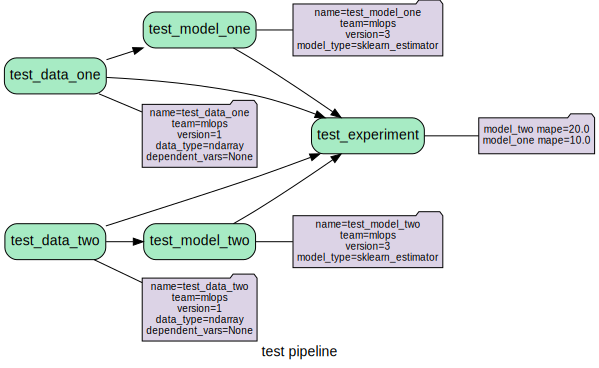

In [8]:
loader.visualize()